# Virginia COVID-19 Cases - Obtain, Scrub, and Explore

## Overview and Motivation

Effective July 1, 2020,  the state of Virginia entered the third phase of the “Forward Virginia” plan to gradually ease restrictions in place for COVID-19. On July 28, additional restrictions were imposed on restaurants and bars in the Hampton Roads area of southeastern Virginia ([Schneider, Gregory S. (July 28, 2020). "Virginia governor adds restrictions in Hampton Roads region after surge in coronavirus cases". The Washington Post. Retrieved July 28, 2020.](https://www.washingtonpost.com/local/coronavirus-virginia-hampton-roads-dc-maryland/2020/07/28/3aefc31c-d0d9-11ea-8c55-61e7fa5e82ab_story.html)). This project was inspired out of an interest in comparing the severity of later outbreaks, in southeaster Virginia with the number and proportion of cases in other areas of the state. In other words, in areas where the cases, hospitalizations, or deaths were decreasing, were they higher or lower than in lately restricted areas?



__Import Required Libraries__

In [ ]:
# importing os for directory / path operations
import os
os.getcwd()

'/home/jovyan/work/va-covid-eda/notebooks'

In [ ]:
# moving up to the repo path
os.chdir('../')
os.getcwd()

'/home/jovyan/work/va-covid-eda'

In [ ]:
# importing for dataframe
import pandas as pd

# importing for plotting
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# load python's `autoreload`, to update any module changes
%load_ext autoreload

# turn on `autoreload`
%autoreload 2

Install / import Datapane to enable interactive object saving / embedding.

In [ ]:
# installing datapane
!pip install datapane

# importing datapane to enable interactive exports
import datapane as dp

     |████████████████████████████████| 1.5 MB 3.9 MB/s eta 0:00:01     |█████████▍                      | 450 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 63.8 MB 66 kB/s s eta 0:00:01    |▍                               | 778 kB 15.5 MB/s eta 0:00:05     |█                               | 1.8 MB 15.5 MB/s eta 0:00:04
     |████████████████████████████████| 82 kB 938 kB/s  eta 0:00:01
     |████████████████████████████████| 49 kB 5.6 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 4.4 MB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 33.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.8 MB 28.1 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 1.2 MB/s  eta 0:00:01
     |████████████████████████████████| 727 kB 35.5 MB/s eta 0:00:01
Reason for being yanked: Missing python_requires in setup.py
     |████████████████████████████████| 54 kB 1.9 MB/s  eta 0:00:01
     |████████████████████████████████| 269 kB 34.9 

In [ ]:
# creating a directory for saving datapane report objects
if not os.path.exists('reports/'):
    os.mkdir('reports/')

In [ ]:
# TEST
# adding a text markdown object
# markdown = dp.Markdown("# 2nd version of my 2nd test report")

# creating the report object from the markdown text
# report = dp.Report(markdown)

# saving the report as an html file
# report.save(path='reports/test-report.html')

Log into the datapane server

In [ ]:
# logging into the datapane server
!datapane login --token=#################

Logged in to https://datapane.com as jamel


In [ ]:
# verifying suthentication
!datapane ping

Connected to https://datapane.com as jamel


In [ ]:
# publishing and opening the report (while logged into Datapane) 
# report.publish(name='test-report-2-2', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/jamel/reports/test-report-2-2/


In [ ]:
# previewing the report
# report.preview()

In [ ]:
# importing plotly express for plot animation
try:
    import plotly.express as px
except:
    !pip install plotly
    import plotly.express as px


## Obtain Data

Data sourced from [Virginia Department of Health](https://www.vdh.virginia.gov/coronavirus/) (VDH)--last updated July 30, 2020.

Each row represents the overall count of COVID-19 cases, hospitalizations, deaths for each locality in Virginia by report date since reporting began for this dataset.

Column Name |	Description	| Type
--- | --- | ---
Report Date |	Date when the case, hospitalization, or death is published |	Date & Tim
FIPS |	5-digit code (51XXX) for the locality |	Plain Text
Locality |	Independent city or county in Virginia |	Plain Text
VDH Health District |	Health district name assigned by the Virginia Department of Health. There are 35 health districts in Virginia. |	Plain Text
Total Cases |	Total number of COVID-19 cases |	Number
Hospitalizations |	Total number of COVID-19 hospitalizations |	Number
Deaths |	Total number of COVID-19 deaths |	Number


In [ ]:
# reading VDH data from csv file
data_df = pd.read_csv("data/VDH-COVID-19-PublicUseDataset-Cases.csv", 
                      dtype={"fips": str})

# viewing dataframe shape and first / last rows
print(data_df.shape, "\n")
display(data_df.head())

(18088, 7) 



,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths
0,03/17/2020,51001,Accomack,Eastern Shore,0,0,0
1,03/17/2020,51003,Albemarle,Thomas Jefferson,0,0,0
2,03/17/2020,51005,Alleghany,Alleghany,0,0,0
3,03/17/2020,51007,Amelia,Piedmont,0,0,0
4,03/17/2020,51009,Amherst,Central Virginia,0,0,0


## Scrub Data

__View dataset info__

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18088 entries, 0 to 18087
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Report Date          18088 non-null  object
 1   FIPS                 18088 non-null  int64 
 2   Locality             18088 non-null  object
 3   VDH Health District  18088 non-null  object
 4   Total Cases          18088 non-null  int64 
 5   Hospitalizations     18088 non-null  int64 
 6   Deaths               18088 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 989.3+ KB


There are no rows missing data.

We will make a copy of the dataframe, for data preparation.

In [ ]:
# instantiating a copy of the dataframe as cities_df
cities_df = data_df.copy()

# viewing first rows of dataframe
cities_df.head()

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths
0,03/17/2020,51001,Accomack,Eastern Shore,0,0,0
1,03/17/2020,51003,Albemarle,Thomas Jefferson,0,0,0
2,03/17/2020,51005,Alleghany,Alleghany,0,0,0
3,03/17/2020,51007,Amelia,Piedmont,0,0,0
4,03/17/2020,51009,Amherst,Central Virginia,0,0,0


In [ ]:
# converting column name spaces to "_" and converting to lower case
cities_df.columns = [x.lower().replace(" ", "_") for x in cities_df.columns]

# convert the `locality` column to string type
cities_df["locality"] = cities_df["locality"].astype(str)

# dropping the health district column
cities_df.drop(["vdh_health_district"], axis=1, inplace=True)

# viewing info after adjustments
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18088 entries, 0 to 18087
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   report_date       18088 non-null  object
 1   fips              18088 non-null  int64 
 2   locality          18088 non-null  object
 3   total_cases       18088 non-null  int64 
 4   hospitalizations  18088 non-null  int64 
 5   deaths            18088 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 848.0+ KB


## Explore Data

Let's first see how many unique localities (independent cities and counties) are there, in Virginia.

In [ ]:
cities_df.locality.nunique()

133

We know from our data dictionary that the `fips` code is unique to a locality, so the two columns should have the same number of unique values.

In [ ]:
cities_df.fips.nunique()

133

We can view a 'spaghetti line' trend for total cases in each locality.

In [ ]:
# viewing cases over time by locality
fig = px.line(cities_df, x='report_date', y='total_cases',
    line_group="locality", color="locality",
    title="Total Cases by Locality, March through July 2020")

# publish interactive report to datapane
line_report = dp.Report(dp.Plot(fig) ) #Create a report
line_report.publish(name='line_plotly', open=True, visibility='PUBLIC') #Publish the report

# show the notebook fig
fig.show()

In [ ]:
# embedding the report from datapane into the notebook
# line_report.preview()

Though lines appear crowded in a static view, interactive plotting enables us to isolate locality by passing the cursor over the plot - lines.

Using the interactive plot, we can easily identify localities that appear to experience a sudden rise in  cases, in July, as Virginia Beach, Norfolk, and Chesapeake--all in Virginia's Hampton Roads region.

__Group and Sort by Top Values for Each of Cases, Hospitalizations, and Deaths__

We have observed that the dataframe is grouped by `report_date` and ordered by `locality`. Let's group by locality and plot top values for the numerical features (`total_cases`, `hospitalizations`, and `deaths`).

__Cases__

In [ ]:
# sorting highest - to - lowest by cases
cases_df = pd.DataFrame(cities_df.groupby('locality')[['total_cases']].sum().
                        sort_values(by='total_cases', ascending=False))

# adding an index
cases_df.reset_index(inplace=True)

# viewing the grouped / sorted cases dataframe shape and head
display(cases_df.shape, cases_df.head(10))

(133, 2)

,locality,total_cases
0,Fairfax,1106116
1,Prince William,569103
2,Loudoun,295934
3,Arlington,213985
4,Henrico,211272
5,Chesterfield,207035
6,Alexandria,194493
7,Richmond City,159178
8,Virginia Beach,122864
9,Manassas City,104981


Our highest value for total cases in a locality is above 1.1 million. We observe that Richmond City has a greater number of cases than Virginia Beach. No other Hampton Roads localities are included among those with the 10 highest case - count.

_Plot Cases_

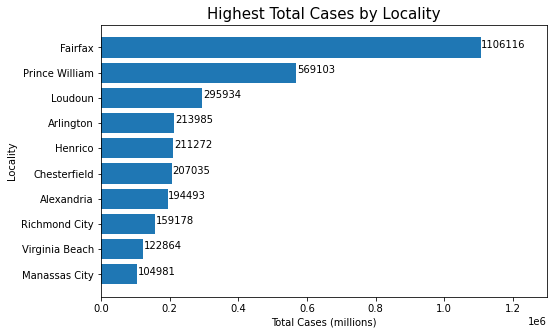

In [ ]:
# defining the plot
plt.figure(figsize=(8,5))
case_plot = plt.barh(y = cases_df.head(10)['locality'], 
         width=cases_df.head(10).total_cases)

# adding labels, title, and limits
plt.xlabel('Total Cases (millions)')
plt.ylabel('Locality')
plt.title("Highest Total Cases by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=1300000) # expand right border

# add values to end of bars
for index, value in enumerate(cases_df.head(10).total_cases):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

We see the highest number of total cases for the period in Fairfax--almost double that of the next highest locality.

__Hospitalizations__

In [ ]:
# by hospitalizations
hospitalizations_df = cities_df.groupby(
    'locality')['hospitalizations'].sum().sort_values(ascending=False)
hospitalizations_df.head(10)

# sorting highest - to - lowest by hospitalizations
hospitalizations_df = pd.DataFrame(cities_df.groupby('locality')[['hospitalizations']].sum().
                        sort_values(by='hospitalizations', ascending=False))

# adding an auto - incrementing index
hospitalizations_df.reset_index(inplace=True)

# viewing highest value for hospitalizations
hospitalizations_df.head(1)

,locality,hospitalizations
0,Fairfax,138320


Fairfax also accounts for the highest number of COVID-19 hospitalizations, in the examined time period.

_Plot Hospitalizations_

We create a plot for hospitalizations, similar to the static plot for total cases but not so similar that it would save much-if-any effort to place the plotting code in a function.

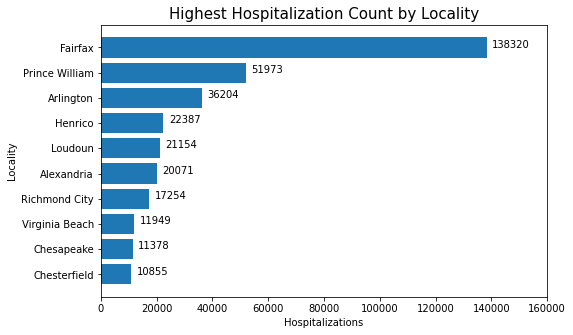

In [ ]:
# defining the plot
plt.figure(figsize=(8,5))
barplot = plt.barh(y = hospitalizations_df.head(10)['locality'], 
         width=hospitalizations_df.head(10).hospitalizations)

# adding labels, title, and limits
plt.xlabel('Hospitalizations')
plt.ylabel('Locality')
plt.title("Highest Hospitalization Count by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=160000) # expand right border beyone the highest value

# add values to end of bars
for index, value in enumerate(hospitalizations_df.head(10).hospitalizations):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

The same localities in the top 5 for total cases are also in the top 5 for hospitalization. Fairfax reports more than 2.6 - times the hospitalizations of the next - highest reported locality, Prince William.

__Deaths__

In [ ]:
# by deaths
deaths_df = cities_df.groupby('locality')['deaths'].sum().sort_values(ascending=False)
deaths_df.head(10)

# by hospitalizations
deaths_df = cities_df.groupby('locality')['deaths'].sum().sort_values(ascending=False)
deaths_df.head(10)

# sorting highest - to - lowest by deaths
deaths_df = pd.DataFrame(cities_df.groupby('locality')[['deaths']].sum().
                        sort_values(by='deaths', ascending=False))

# adding an auto - incrementing index
deaths_df.reset_index(inplace=True)

# viewing highest value for deaths
deaths_df.head(1)

,locality,deaths
0,Fairfax,37990


The greatest number of related deaths are also reported from Fairfax.

_Plot Deaths_

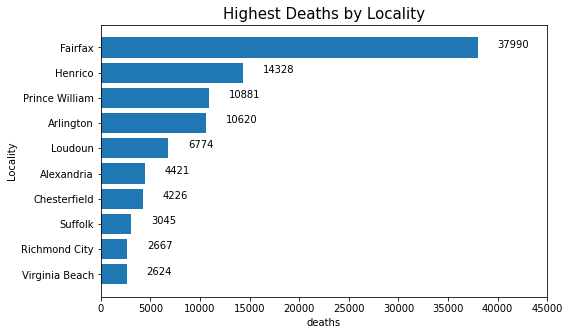

In [ ]:
# defining the plot
plt.figure(figsize=(8,5))
barplot = plt.barh(y = deaths_df.head(10)['locality'], 
         width=deaths_df.head(10).deaths)

# adding labels, title, and limits
plt.xlabel('deaths')
plt.ylabel('Locality')
plt.title("Highest Deaths by Locality", fontsize=15)
plt.ylim(plt.ylim()[::-1]) # display with highest value on top
plt.xlim(right=45000) # expand right border beyone the highest value

# add values to end of bars
for index, value in enumerate(deaths_df.head(10).deaths):
    plt.text(value + 2000, index, str(value), fontsize=10)

# displaying plot
plt.show()

Fairfax records greater than 2.6 - times the number of deaths recorded for Henrico, the next highest reporting locality for this category.

---

__Serialize Objects__

We will use the pickle library, to serialize our dataframes for continuing in the next notebook.

In [ ]:
# import serialization library
# import pickle


__Create a function to serialize / de - serialize objects from a helper file.__

In [ ]:
# creating a `helpers` directory, if it does not exist
if not os.path.exists('helpers'):
    os.mkdir('helpers')

print("-"*15, f"helpers directory created", "-"*15)

--------------- helpers directory created ---------------


In [ ]:
%%writefile C:\Users\jamel\myprojects\va-covid-eda\helpers\helper_func.py
# creating a function for saving an object to a file
def save_pickle (self, filename=None):
    ''' takes an object variable as `self` and a file name
    as `filename`; saves the object as a serialized file
    in the `data` subdirectory
    '''
    import os
    import pickle
    
    # making a pickles directory, if it does not exist
    try:
        if not os.path.exists('pickles'):
            os.mkdir('pickles')
    except:
        print("directory 'pickles' already exists")
        pass

    print("-"*15, f"PICKLING {filename}", "-"*25)
    with open(f'pickles/{filename}', 'wb') as filename:
        pickle.dump(self, filename, pickle.HIGHEST_PROTOCOL)
    print("Saved as ", filename, "\n")
    

# creating a function to deserialize and instantiate objects
def read_pickle(filepath):
    ''' takes a string file(path) of a pickled file
    and returns the de - serialized file
    '''
    import os
    import pickle
    
    with open(filepath, 'rb') as f:
        pfile = pickle.load(f)
    print("File restored from {}".format(filepath))
    return (pfile)

Overwriting C:\Users\jamel\myprojects\va-covid-eda\helpers\helper_func.py


Make the `helpers` folder a package, available to subsequent notebooks


In [ ]:
# creating `__init__.py`file inside the `helpers` folder
# external operation
# listing directory files
# os.listdir(r"C:\Users\jamel\myprojects\va-covid-eda\helpers")

Add helper functions to "\_\_init_\_\.py" file (and to `helpers` package)

In [ ]:
%%writefile C:\Users\jamel\myprojects\va-covid-eda\helpers\__init__.py
# importing to __init__.py
from .helper_func import save_pickle
from .helper_func import read_pickle

Overwriting C:\Users\jamel\myprojects\va-covid-eda\helpers\__init__.py


Import the `helpers` package

In [ ]:
# importing the "helpers folder as a package"
from helpers import helper_func
from helpers import save_pickle

In [ ]:
save_pickle(cities_df, "localities-df.pkl")
save_pickle(cases_df, "cases-df.pkl")
save_pickle(hospitalizations_df, "hospitalizations-df.pkl")
save_pickle(deaths_df, "deaths-df.pkl")

--------------- PICKLING localities-df.pkl -------------------------
Saved as  <_io.BufferedWriter name='pickles/localities-df.pkl'> 

--------------- PICKLING cases-df.pkl -------------------------
Saved as  <_io.BufferedWriter name='pickles/cases-df.pkl'> 

--------------- PICKLING hospitalizations-df.pkl -------------------------
Saved as  <_io.BufferedWriter name='pickles/hospitalizations-df.pkl'> 

--------------- PICKLING deaths-df.pkl -------------------------
Saved as  <_io.BufferedWriter name='pickles/deaths-df.pkl'> 



---

##### [View the full project on Github](https://github.com/jammy-bot/va-covid-eda)